<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; font-weight: bold; font-family: 'Poppins', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    <strong>---No-Churn Telecom – Churn Prediction Project---</strong>
    <div style="font-size: 22px; font-weight: bold; margin-top: 5px;">
        <strong>Project Ref: PM-PR-0017</strong>
    </div>
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 18px; font-weight: bold; color: #2c3e50;">
        <strong>Date:</strong> 18/02/2025
    </span>
</div>

</div>

</div>

</div>

</div>


In [2]:
import pickle   
import pandas as pd
import numpy as np
import pymysql
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from scipy import stats
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
    Extracting Data from a SQL Database
</di>

In [5]:
pip install pymysql

In [445]:
host = "18.136.157.135"
user = "dm_team3"
password = "DM!$!Team!27@9!20&"
database = "project_telecom"

try:
    conn = pymysql.connect(host=host, user=user, password=password, database=database)

    query = "SELECT * FROM telecom_churn_data"

    df = pd.read_sql(query, conn)

    conn.close()

except pymysql.MySQLError as e:
    print(f"Error connecting to the database: {e}")

In [446]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    Let's connect to the database, fetch all data from the table, load it into Pandas, and then close the database connection to free up resources.
</di>
</div>
  </div>
</div>
   </div>
</div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Data Preprocessin & Data Cleaning.
</di>

In [449]:
df.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    Renaming columns is needed to replace unclear default names with meaningful ones, ensuring clarity, consistency, better data processing, and improved readability.
</div>


In [452]:
column_names = [
    "State", "Account_Length", "Area_Code", "Phone", "International_Plan", 
    "VMail_Plan", "VMail_Message", "Day_Mins", "Day_Calls", "Day_Charge", 
    "Eve_Mins", "Eve_Calls", "Eve_Charge", "Night_Mins", "Night_Calls", 
    "Night_Charge", "International_Mins", "International_Calls", 
    "International_Charge", "CustServ_Calls", "Churn"
]

df.columns = column_names

In [456]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [457]:
df.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    By converting data types post-load, we enhance data integrity, consistency, and performance, ensuring that the dataset is fully prepared for analysis and modeling according to project specifications.
</div>

In [460]:
convert_to_object = ["State", "Phone", "International_Plan", "VMail_Plan","Churn"]
convert_to_numeric = [
    "Account_Length", "Area_Code", "VMail_Message", "Day_Mins", "Day_Calls", 
    "Day_Charge", "Eve_Mins", "Eve_Calls", "Eve_Charge", "Night_Mins", "Night_Calls", 
    "Night_Charge", "International_Mins", "International_Calls", 
    "International_Charge", "CustServ_Calls"
]

for col in convert_to_object:
    df[col] = df[col].astype("object")

for col in convert_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [462]:
df.nunique()

State                     51
Account_Length           218
Area_Code                  3
Phone                   4617
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_Calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
     Drops Phone, since it's a unique identifier and not useful for modeling.
</div>

In [464]:
df.drop(columns=['Phone'], inplace=True)

In [465]:
df.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [466]:
df.shape

(4617, 20)

In [467]:
df.size

92340

In [468]:
df.duplicated().sum()

0

In [469]:
df.shape

(4617, 20)

In [470]:
df.nunique()

State                     51
Account_Length           218
Area_Code                  3
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_Calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

In [471]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for column 'State':
State
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'Account_Length':
Account_Length
90     63
87     56
105    54
93     54
112    53
       ..
200     1
2       1
215     1
199     1
233     1
Name: count, Length: 218, dtype: int64

--------------------------------------------------

Value counts for column 'Area_Code':
Area_Code
415    2299
408    1161
510    1157
Name: count, dtype: int64

---

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Exploratory Data Analysis (EDA)</div>

Churn
False.    3961
True.      656
Name: count, dtype: int64

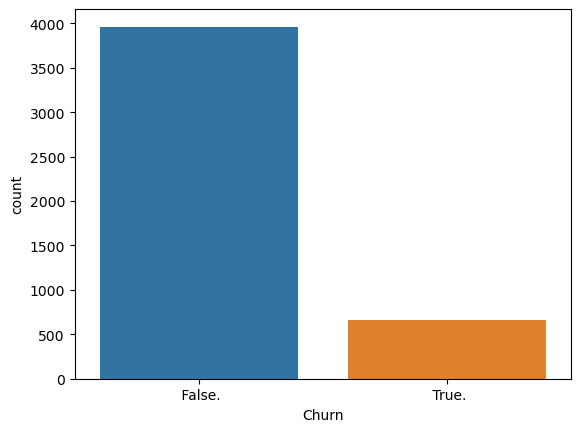

In [474]:
sns.countplot(x=df['Churn'],hue=df['Churn'])
df.Churn.value_counts()

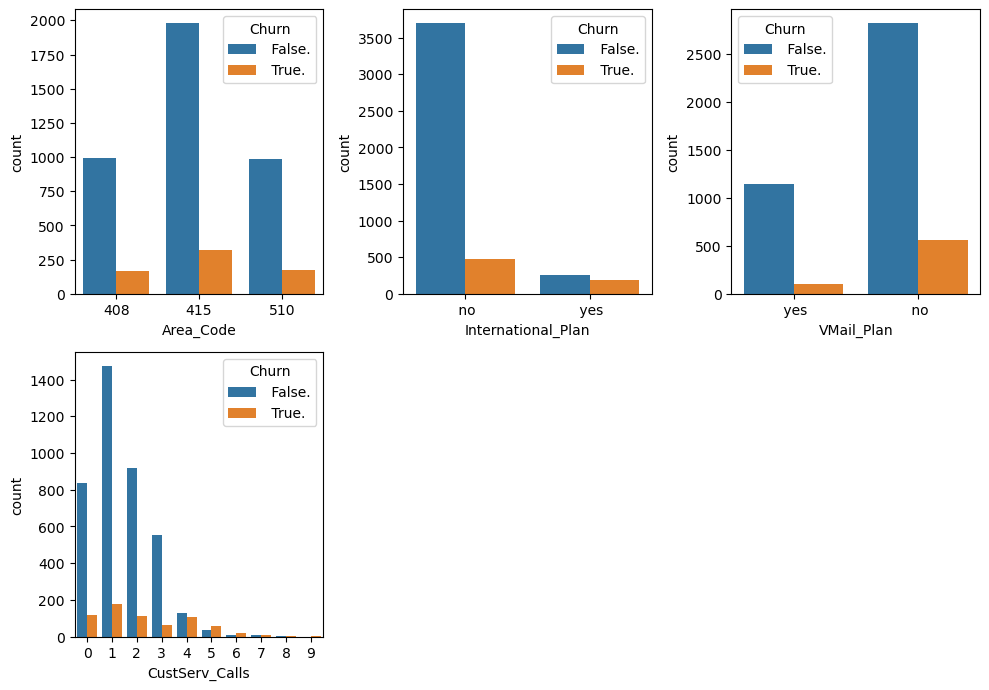

In [475]:
df_count = ['Area_Code', 'International_Plan', 'VMail_Plan', 'CustServ_Calls']

plt.figure(figsize=(10,10))
plot = 1

for i in df_count:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        
        sns.countplot(x=df[i], hue=df['Churn'])
        plt.xlabel(i)
        
    plot += 1

# Adjust layout
plt.tight_layout()
plt.show()

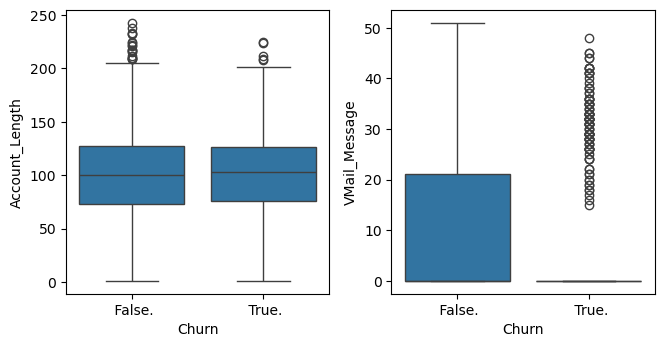

In [476]:
df_numerical = ['Account_Length', 'VMail_Message']

plt.figure(figsize=(10, 10))
plot = 1

for col in df_numerical:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        
        sns.boxplot(x='Churn', y=col, data=df)
        plt.xlabel('Churn')
        plt.ylabel(col)
        plot += 1

plt.tight_layout()
plt.show()

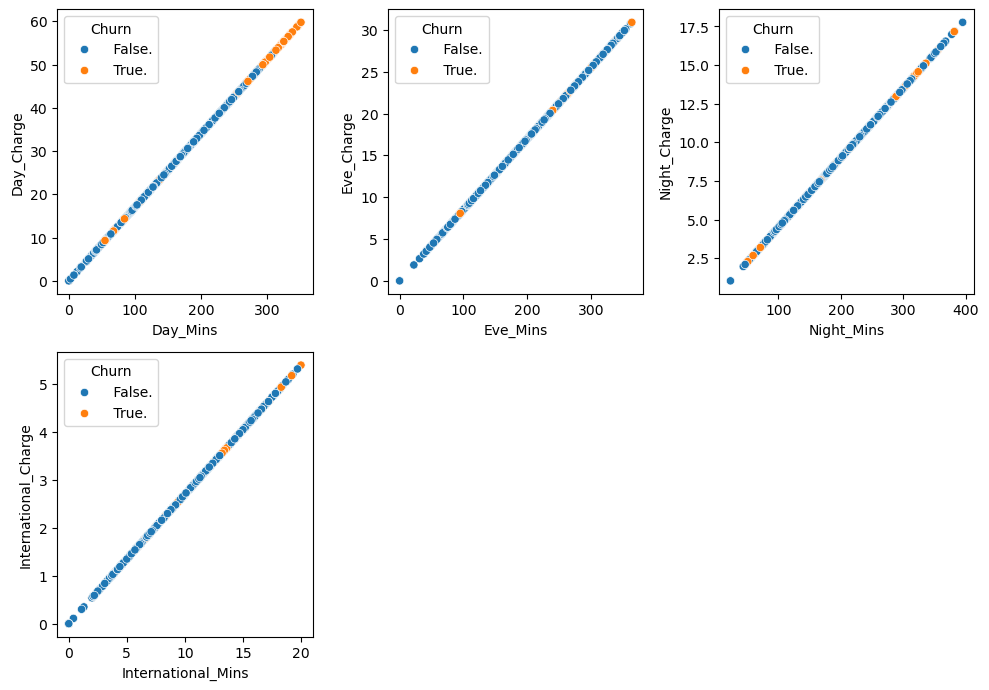

In [477]:
plot_columns = [
    ('Day_Mins', 'Day_Charge', 'scatter'),  
    ('Eve_Mins', 'Eve_Charge', 'scatter'),  
    ('Night_Mins', 'Night_Charge', 'scatter'),  
    ('International_Mins', 'International_Charge', 'scatter')  
]

plt.figure(figsize=(10, 10))
plot = 1

for x, y, plot_type in plot_columns:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        if plot_type == 'scatter':
            sns.scatterplot(x=x, y=y, hue='Churn', data=df)
        plt.xlabel(x)
        plt.ylabel(y)
        plot += 1

plt.tight_layout()
plt.show()


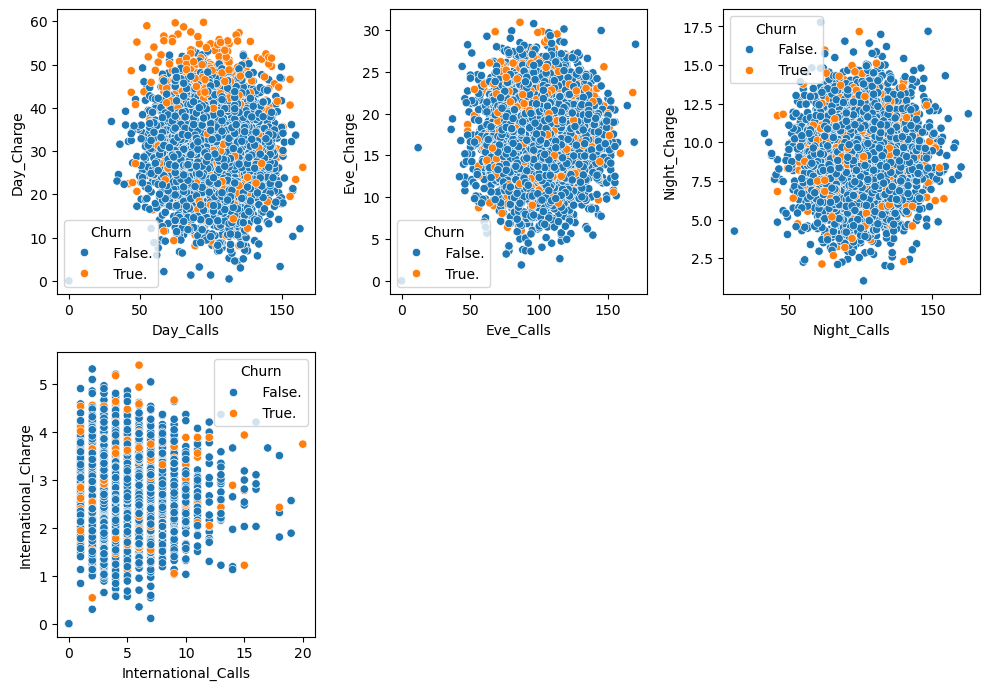

In [478]:
plot_columns = [
    ('Day_Calls', 'Day_Charge', 'scatter'),  
    ('Eve_Calls', 'Eve_Charge', 'scatter'),  
    ('Night_Calls', 'Night_Charge', 'scatter'),  
    ('International_Calls', 'International_Charge', 'scatter')  
]

# Create plots in a loop
plt.figure(figsize=(10, 10))
plot = 1

for x, y, plot_type in plot_columns:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        if plot_type == 'boxplot':
            sns.boxplot(x='Churn', y=x, data=df)
        elif plot_type == 'scatter':
            sns.scatterplot(x=x, y=y, hue='Churn', data=df)
        plt.xlabel(x)
        plt.ylabel(y)
        plot += 1

plt.tight_layout()
plt.show()


<div style="background: linear-gradient(135deg, #6a11cb, #2575fc); color: white; padding: 20px; border-radius: 12px; font-size: 20px; font-weight: bold; box-shadow: 3px 3px 12px rgba(0, 0, 0, 0.2); border-left: 6px solid #3a0ca3;">
    <ul style="list-style-type: disc; padding-left: 20px; line-height: 1.8;">
        <li>This shows that the dataset is imbalanced, with more <strong>False</strong> than <strong>True</strong> values (i.e., most customers do not churn).</li>
        <li><strong>Service Usage and Charges:</strong> Higher usage, particularly during peak hours, correlates with increased charges. Customers with elevated usage and charges are more likely to churn, though this is not the sole determinant.</li>
        <li><strong>Service Plans:</strong> Customers without international or voicemail plans exhibit lower churn rates compared to those with these services. This suggests that the presence of certain service plans may influence customer retention.</li>
        <li><strong>Customer Service Interactions:</strong> A higher number of customer service calls is associated with increased churn. This indicates that frequent service issues or dissatisfaction with support can lead to customer migration.</li>
        <li><strong>Demographic Factors:</strong> Area codes with higher concentrations of non-churning customers suggest that geographic location may influence churn behavior.</li>
        <li><strong>Data Distribution and Clustering:</strong> Data points often cluster within specific ranges, indicating that most customers fall within certain usage and charge brackets. Churned customers are more prevalent in higher usage and charge segments, though overlap exists.</li>
        <li><strong>Outliers and Anomalies:</strong> Outliers, such as customers with unusually low charges despite high usage, may indicate unique behaviors or data anomalies.</li>
        <li><strong>Class Imbalance:</strong> Datasets often have more non-churning customers than churning ones, which can affect the accuracy of churn prediction models.</li>
    </ul>
</div>
</ul>
</div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Handling Outliers</div>

In [494]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_Calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

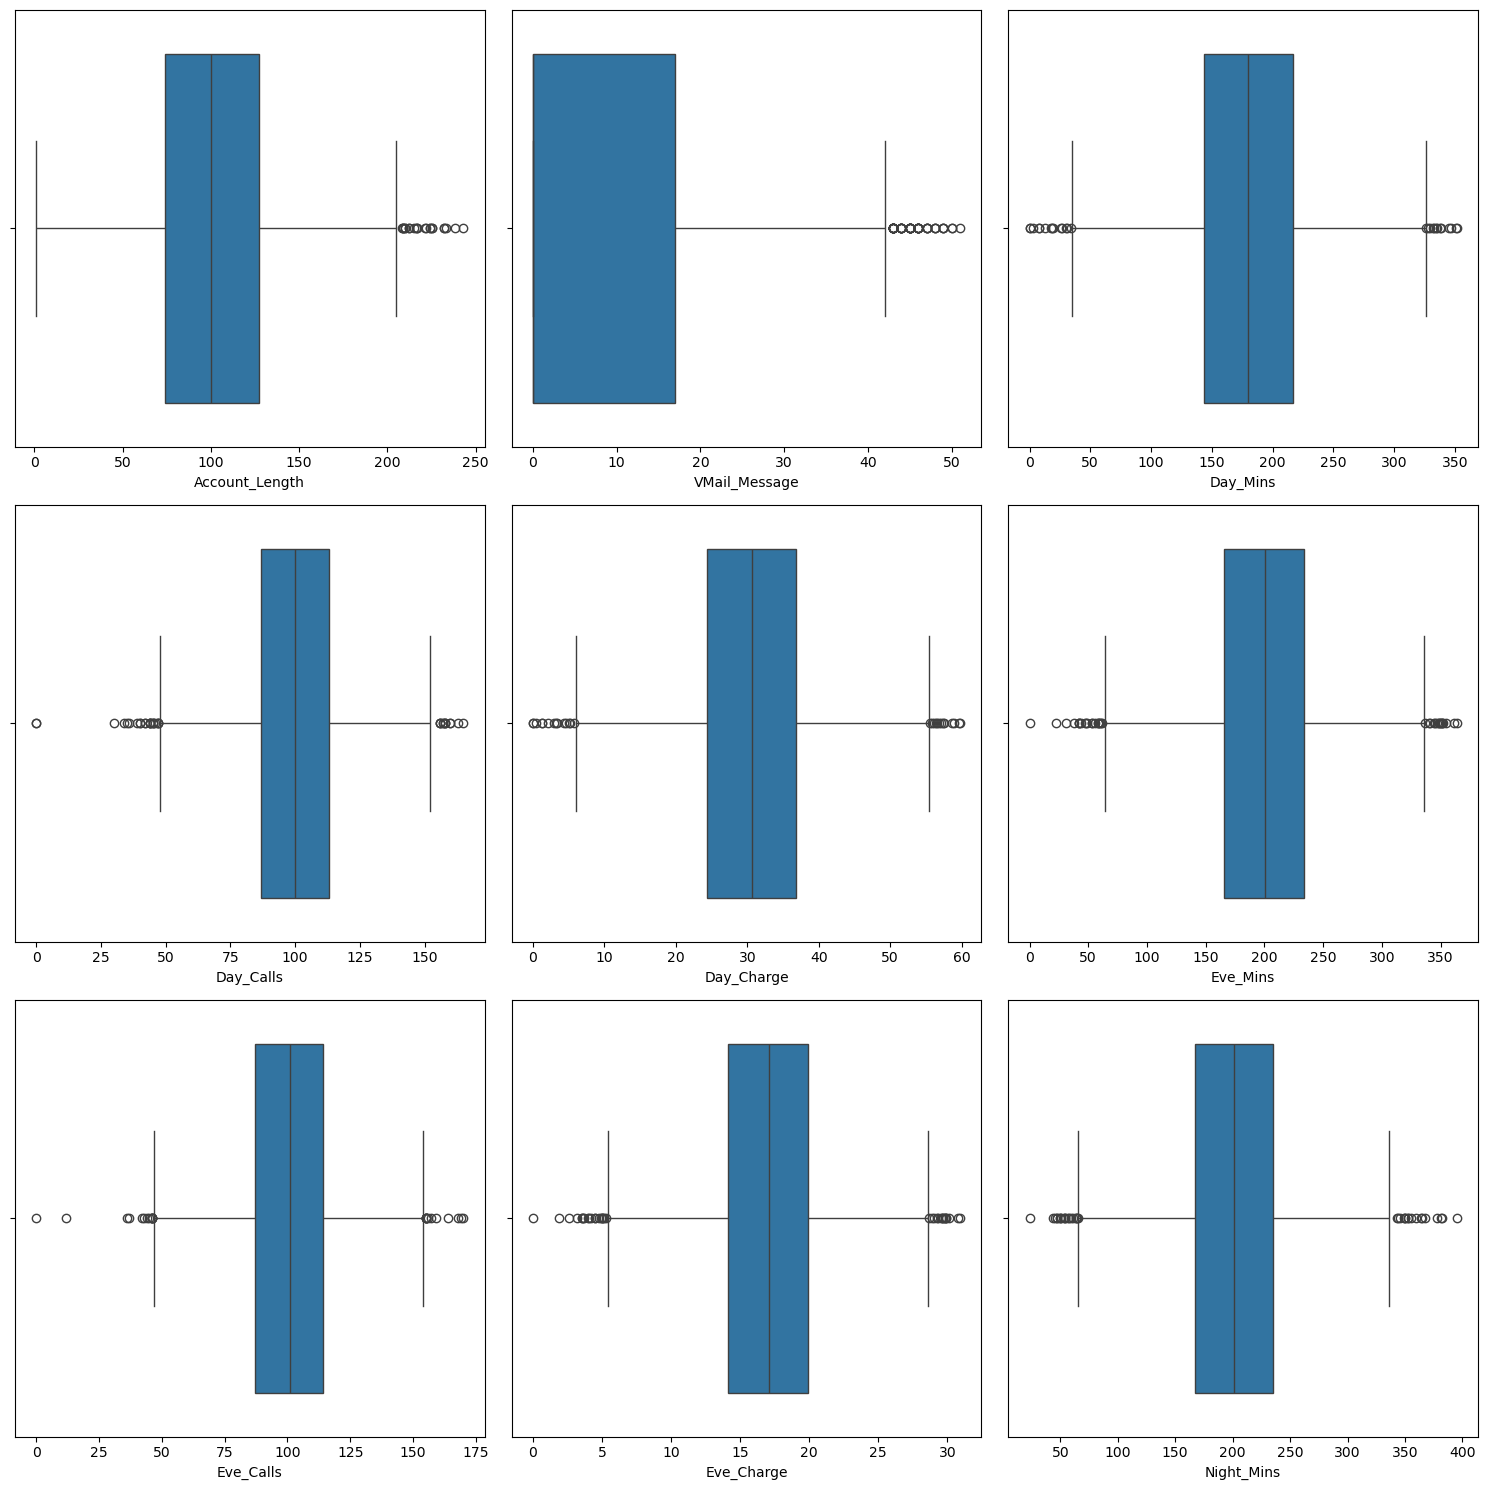

In [495]:
plot_columns = [
       'Account_Length',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_Calls',
       'International_Charge', 'CustServ_Calls'
]


plt.figure(figsize=(15, 15))
plot = 1

for column in plot_columns:
    if plot <= 9:  
        ax = plt.subplot(3, 3, plot)
        sns.boxplot(x=column, data=df)
        plot += 1

plt.tight_layout()
plt.show()


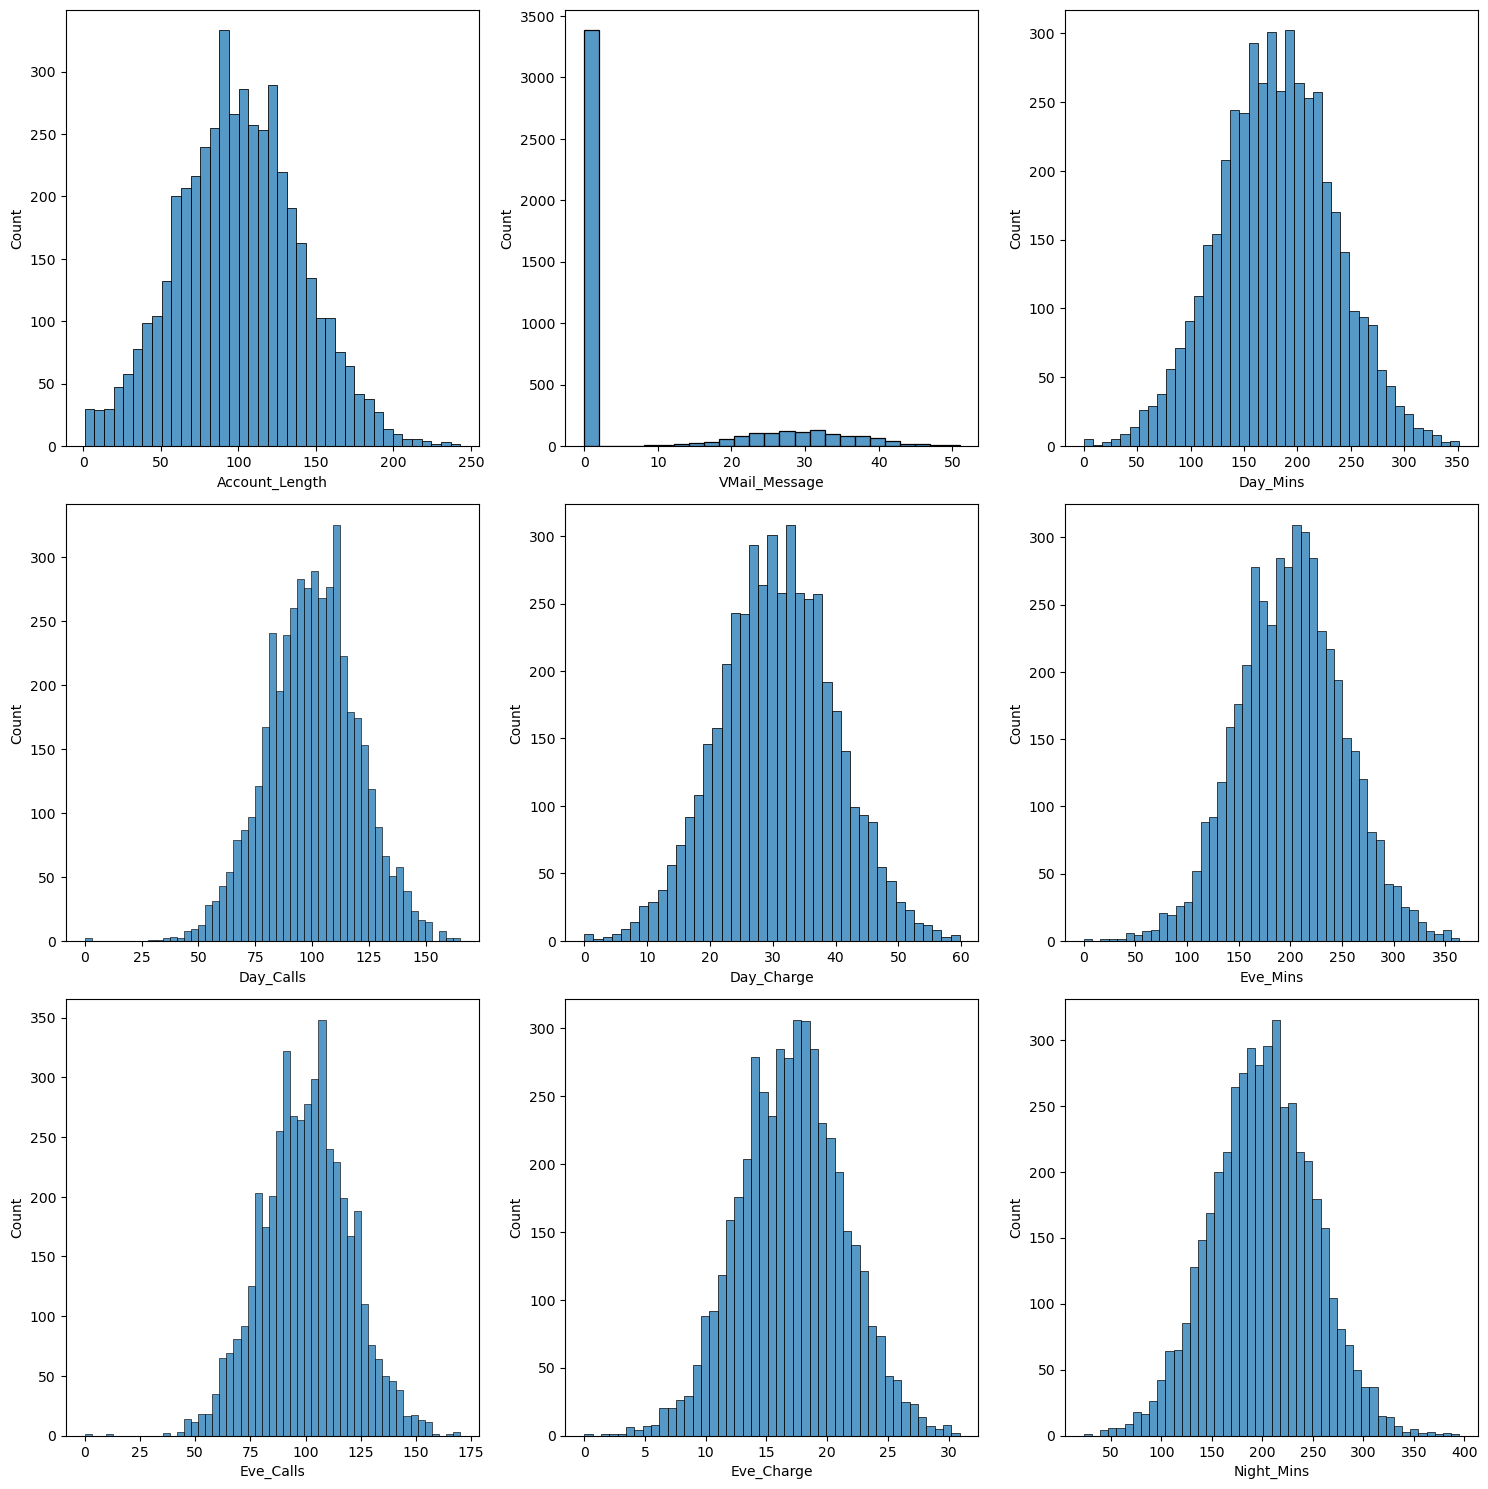

In [496]:
plot_columns = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
    'International_Mins', 'International_Calls', 'International_Charge', 'CustServ_Calls'
]

plt.figure(figsize=(15, 15))
plot = 1

for column in plot_columns:
    if plot <= 9:  
        ax = plt.subplot(3, 3, plot)
        sns.histplot(x=column, data=df)
        plot += 1

plt.tight_layout()
plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    Applying the appropriate method per column based on distribution, avoiding unnecessary transformations, preserving data consistency, and effectively handling outliers.
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Z-score (Replacing with Mean)</strong> → For Normally Distributed Data</li>
        <li><strong>IQR (Replacing with Median)</strong> → For Skewed Data</li>
    </ul>
</div>


In [499]:
columns = ['Account_Length', 'Day_Mins', 'Day_Calls', 'Day_Charge',
           'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
           'Night_Charge', 'International_Mins', 'International_Calls', 'International_Charge',
           'CustServ_Calls']

z_scores = np.abs(stats.zscore(df[columns]))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

df_cleaned = df.copy()
for col in columns:
    mean_value = df[col].mean()
    df_cleaned.loc[outliers, col] = mean_value

In [500]:
columns = ['VMail_Message']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in columns:
    median_value = df[col].median()
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = median_value

In [501]:
# Check the shape of the original and cleaned DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (4617, 20)
Cleaned DataFrame shape: (4617, 20)


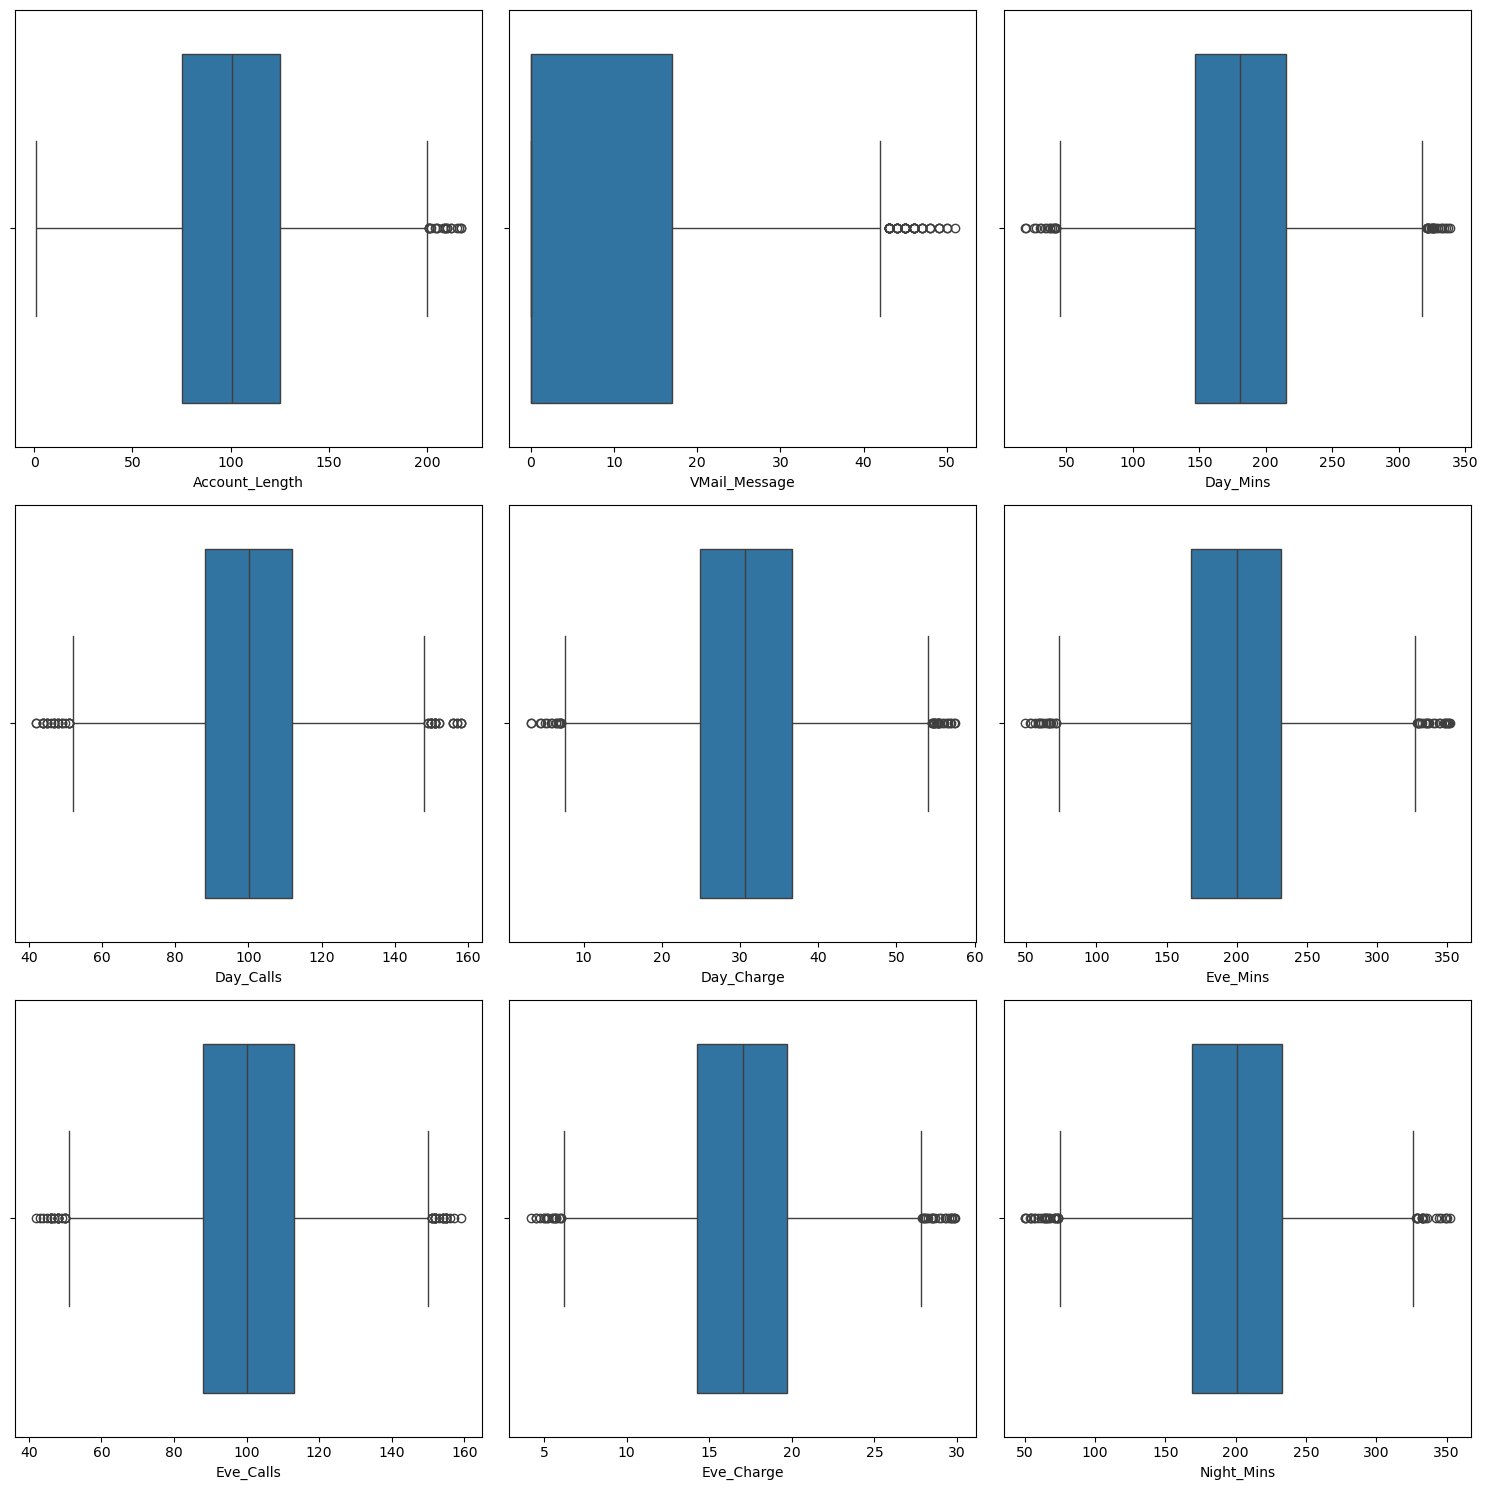

In [502]:
plot_columns = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
    'International_Mins', 'International_Calls', 'International_Charge', 'CustServ_Calls'
]

plt.figure(figsize=(15, 15))
plot = 1

for column in plot_columns:
    if plot <= 9:  
        ax = plt.subplot(3, 3, plot)
        sns.boxplot(x=column, data=df_cleaned)
        plot += 1

plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Encoding</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    Encoding is crucial because it transforms non-numeric, categorical features into numeric values, making them ready for machine learning models, which can only work with numerical data.
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li>Handles categorical features properly and prevents formatting issues.</li>
        <li>Uses efficient encoding: <strong>LabelEncoder</strong> for high-cardinality data and <strong>map()</strong> for binary variables.</li>
        <li>Ensures data is numerically formatted for seamless integration into machine learning models.</li>
    </ul>
</div>


In [506]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower().map({'false.': 0, 'true.': 1})
df['International_Plan'] = df['International_Plan'].str.strip().str.lower().map({'no': 0, 'yes': 1})
df['VMail_Plan'] = df['VMail_Plan'].str.strip().str.lower().map({'no': 0, 'yes': 1})
df['State'] = LabelEncoder().fit_transform(df['State'])

In [508]:
df.dtypes

State                     int32
Account_Length            int64
Area_Code                 int64
International_Plan        int64
VMail_Plan                int64
VMail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                     int64
dtype: object

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Feature Selection</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Filter Methods</strong><br>
    Filter methods use statistical tests to select important features based on their relationship with the target variable.
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Mutual Information (MI) Method:</strong>
            <ul>
                <li>Handles both categorical & continuous features.</li>
                <li>Detects non-linear relationships.</li>
                <li>Ranks features by importance.</li>
                <li>Preserves useful weakly correlated features.</li>
            </ul>
        </li>
        <li><strong>Correlation (Pearson's Method):</strong>
            <ul>
                <li>Removes redundant features (e.g., Day_Mins & Day_Charge).</li>
                <li>Reduces multicollinearity.</li>
                <li>Fast & simple for filtering.</li>
            </ul>
        </li>
    </ul>
</div>


In [511]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop('Churn', axis=1)
y = df['Churn']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_results = mi_results.sort_values(by='MI Score', ascending=False)
print(mi_results)


                 Feature  MI Score
8             Day_Charge  0.055010
6               Day_Mins  0.052919
3     International_Plan  0.032839
18        CustServ_Calls  0.029178
4             VMail_Plan  0.010278
15    International_Mins  0.007052
5          VMail_Message  0.006459
2              Area_Code  0.005919
7              Day_Calls  0.005736
17  International_Charge  0.005642
14          Night_Charge  0.003681
16   International_Calls  0.003464
11            Eve_Charge  0.002023
12            Night_Mins  0.000704
0                  State  0.000000
13           Night_Calls  0.000000
10             Eve_Calls  0.000000
1         Account_Length  0.000000
9               Eve_Mins  0.000000


Churn                   1.000000
International_Plan      0.257524
CustServ_Calls          0.209351
Day_Mins                0.202439
Day_Charge              0.202434
Eve_Mins                0.087042
Eve_Charge              0.087036
International_Mins      0.064731
International_Charge    0.064728
Night_Mins              0.043262
Night_Charge            0.043260
Account_Length          0.018046
Day_Calls               0.016268
Area_Code               0.011995
State                   0.010979
Eve_Calls               0.001943
Night_Calls            -0.006671
International_Calls    -0.045844
VMail_Message          -0.096228
VMail_Plan             -0.110149
Name: Churn, dtype: float64


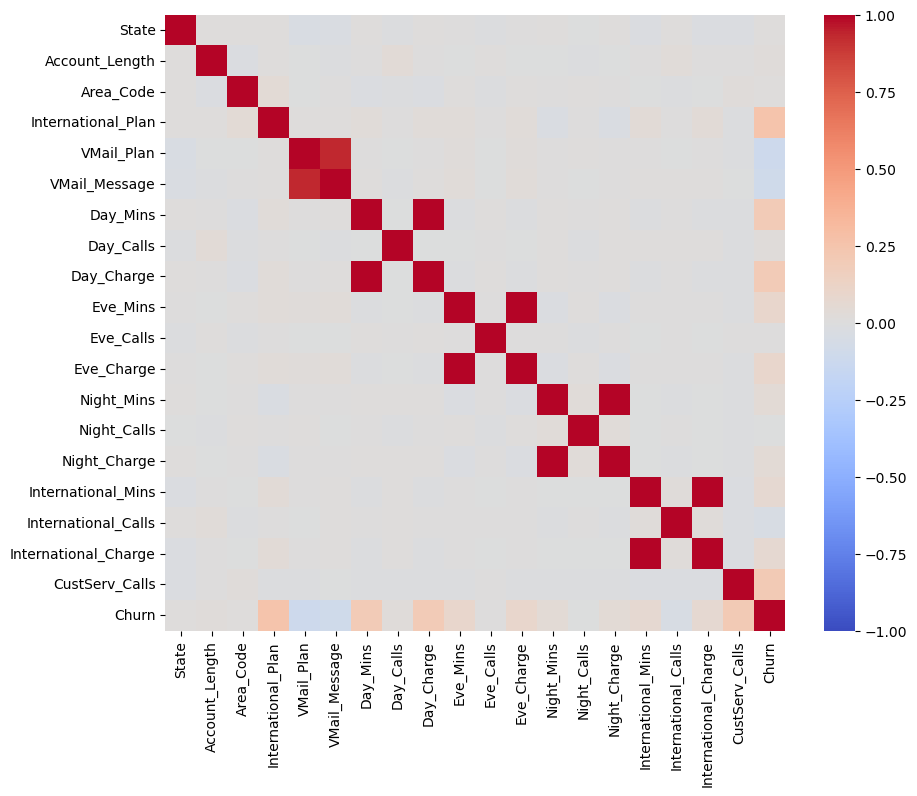

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

print(corr_matrix['Churn'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Handling Multicollinearity</strong><br>
    Highly correlated features can introduce multicollinearity, which may affect model performance. Consider removing one of each pair of highly correlated features:
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Day_Mins</strong> and <strong>Day_Charge</strong>: Correlation = 0.999</li>
        <li><strong>Eve_Mins</strong> and <strong>Eve_Charge</strong>: Correlation = 0.999</li>
        <li><strong>Night_Mins</strong> and <strong>Night_Charge</strong>: Correlation = 0.999</li>
        <li><strong>International_Mins</strong> and <strong>International_Charge</strong>: Correlation = 0.999</li>
    </ul>
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Multicollinearity in Charges and Usage Features</strong><br>
    Charges are highly correlated with usage features, creating redundancy and leading to multicollinearity in the model. Keeping both usage and charge features provides similar information, which doesn't add much value and can complicate the model.
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Usage features</strong> directly reflect customer behavior, making them more interpretable.</li>
        <li><strong>Charges</strong> mainly represent financial aspects and add less predictive value.</li>
        <li>Usage features often have smaller <strong>p-values</strong>, making them more significant for predicting the target.</li>
    </ul>
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Feature Removal Based on Statistical Analysis</strong><br>
    The following features are identified for removal due to high MI and low correlation with the target variable <strong>'Churn'</strong>:
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Weak MI Scores (near-zero impact on 'Churn'):</strong> <br>
            <em>Area_Code (0.0000), Day_Calls (0.0000), Eve_Calls (0.0000), Night_Calls (0.0000)</em> <br>
            These features provide no useful information for predicting churn.
        </li>
        <li><strong>Very Low Correlations (weak predictors):</strong> <br>
            <em>Eve_Calls (0.0019), Night_Calls (-0.0067), International_Calls (-0.0458), Area_Code (0.0119), State (0.0109)</em> <br>
            These features have very low correlation and high p-values, indicating they likely do not impact churn significantly.
        </li>
    </ul>
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Feature Comparison: Account_Length vs. Day_Calls</strong><br>
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Account_Length:</strong> MI = 0.000, Corr = 0.018 (No predictive value)</li>
        <li><strong>Day_Calls:</strong> MI = 0.0004, Corr = 0.016 (Slightly more predictive but still weak)</li>
    </ul>
    Day_Calls has a nonzero MI score, indicating it holds a tiny bit more predictive value than Account_Length, but both remain weak predictors.
</div>


In [518]:
columns_to_drop = [
    'Day_Charge', 'Eve_Charge', 'Night_Charge', 'International_Charge',
    'Eve_Calls', 'Night_Calls', 'Area_Code', 'State', 'Day_Calls','Churn'
]


x = df.drop(columns=columns_to_drop)
y = df['Churn']

In [519]:
x.head()

,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,International_Mins,International_Calls,CustServ_Calls
0,128,0,1,25,265.1,197.4,244.7,10.0,3,1
1,107,0,1,26,161.6,195.5,254.4,13.7,3,1
2,137,0,0,0,243.4,121.2,162.6,12.2,5,0
3,84,1,0,0,299.4,61.9,196.9,6.6,7,2
4,75,1,0,0,166.7,148.3,186.9,10.1,3,3


In [520]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=2)

In [521]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [522]:
y_train.value_counts()

Churn
0    2761
1     470
Name: count, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>SMOTE is important to generate synthetic churn cases, preventing model bias toward non-churners and improving recall for at-risk customers.</li>
    </ul>
</div>


In [523]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [525]:
y_train.value_counts()

Churn
0    2761
1    2761
Name: count, dtype: int64

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Model Building</div>

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LogisticRegression *
</div>

In [529]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(class_weight='balanced')
logistic_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [548]:
y_predLR = logistic_reg.predict(x_test)
y_predLR_train = logistic_reg.predict(x_train)

In [550]:
accuracy = accuracy_score(y_test, y_predLR) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_train) * 100
print(round(accuracy, 2))

77.27
78.49


In [552]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1200
           1       0.35      0.77      0.48       186

    accuracy                           0.77      1386
   macro avg       0.65      0.77      0.67      1386
weighted avg       0.87      0.77      0.80      1386



In [563]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR) * 100
roc_auc

77.33467741935482

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GridSearchCV(LogisticRegression) *</div>

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced'],
    'tol': [1e-4, 1e-3],
    'intercept_scaling': [1, 2]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [1, 2],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             verbose=1)

In [291]:
best_params = grid_search.best_params_

In [292]:
logistic_reg_t = LogisticRegression(**best_params)
logistic_reg_t.fit(x_train, y_train)

LogisticRegression(C=1, class_weight='balanced', intercept_scaling=2,
                   solver='liblinear')

In [293]:
y_predLR_T = logistic_reg_t.predict(x_test)
y_predLR_T_train = logistic_reg_t.predict(x_train)

In [294]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_T_train) * 100
print(round(accuracy, 2))

77.06
79.14


In [295]:
print(classification_report(y_test,y_predLR_T))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1200
           1       0.34      0.75      0.47       186

    accuracy                           0.77      1386
   macro avg       0.65      0.76      0.66      1386
weighted avg       0.87      0.77      0.80      1386



In [296]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR_T) * 100
roc_auc

76.3010752688172

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* SVC *</div>

In [298]:
from sklearn.svm import SVC  
svclassifier = SVC(class_weight='balanced') 
svclassifier.fit(x_train, y_train) 

SVC(class_weight='balanced')

In [299]:
y_pred=svclassifier.predict(x_test)
y_pred_train=svclassifier.predict(x_train)

In [300]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_train) * 100
print(round(accuracy, 2))

87.88
89.06


In [301]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1200
           1       0.53      0.81      0.64       186

    accuracy                           0.88      1386
   macro avg       0.75      0.85      0.78      1386
weighted avg       0.91      0.88      0.89      1386



In [302]:
roc_auc = roc_auc_score(y_test,y_pred) * 100
roc_auc

84.82258064516128

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using SVC *</div>

In [304]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.001, 0.1, 1, 5, 10],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.001, 0.1, 1, 5, 10],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.001, 0.1, 1, 5, 10],
        'kernel': ['poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }
]

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, refit=True, verbose=2, scoring='f1', cv=5)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.6s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.6s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.6s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.7s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.5s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.1, 1, 5, 10],
                          'gamma': ['scale', 'auto'], 'kernel': ['linear']},
                         {'C': [0.001, 0.1, 1, 5, 10],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': [0.001, 0.1, 1, 5, 10], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             scoring='f1', verbose=2)

In [305]:
best_params=grid.best_params_

In [306]:
svclassifier_t = SVC(**best_params,class_weight='balanced')
svclassifier_t.fit(x_train,y_train)

SVC(C=10, class_weight='balanced')

In [307]:
y_hat=svclassifier_t.predict(x_test)
y_hat_train=svclassifier_t.predict(x_train)

In [308]:
accuracy = accuracy_score(y_test, y_hat) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_hat_train) * 100
print(round(accuracy, 2))

90.55
92.01


In [309]:
print(classification_report(y_test,y_hat))  

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1200
           1       0.62      0.75      0.68       186

    accuracy                           0.91      1386
   macro avg       0.79      0.84      0.81      1386
weighted avg       0.91      0.91      0.91      1386



In [310]:
roc_auc = roc_auc_score(y_test,y_hat) * 100
roc_auc

83.86559139784946

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* GradientBoosting *</div>

In [312]:
from sklearn.ensemble import GradientBoostingClassifier  
gbm=GradientBoostingClassifier()
gbm.fit(x_train, y_train) 

GradientBoostingClassifier()

In [313]:
y_predGB =gbm.predict(x_test)     
y_predGB_train =gbm.predict(x_train)     

In [314]:
accuracy = accuracy_score(y_test, y_predGB) * 100
print(round(accuracy, 2)) 
accuracy = accuracy_score(y_train, y_predGB_train) * 100
print(round(accuracy, 2)) 

91.77
95.0


In [315]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1200
           1       0.68      0.74      0.71       186

    accuracy                           0.92      1386
   macro avg       0.82      0.84      0.83      1386
weighted avg       0.92      0.92      0.92      1386



In [316]:
roc_auc = roc_auc_score(y_test,y_predGB) * 100
roc_auc

84.34677419354838


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GradientBoosting *</div>

In [318]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100],
}
XGB=GradientBoostingClassifier() 


rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',
                           param_distributions=param_grid, n_iter=100, cv=2,
                               verbose=2, n_jobs=-1)
                               
                        
rcv.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.4, 0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 65, 80, 100]},
                   scoring='accuracy', verbose=2)

In [319]:
cv_best_params = rcv.best_params_

In [320]:
gbm_t=GradientBoostingClassifier(n_estimators=80, max_depth=7, learning_rate=0.4)
gbm_t.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=7, n_estimators=80)

In [321]:
y_predGB_T=gbm_t.predict(x_test)
y_predGB_T_train=gbm_t.predict(x_train)

In [322]:
accuracy = accuracy_score(y_test, y_predGB_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predGB_T_train) * 100
print(round(accuracy, 2))

94.16
100.0


In [323]:
print(classification_report(y_test,y_predGB_T))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.83      0.71      0.77       186

    accuracy                           0.94      1386
   macro avg       0.89      0.84      0.87      1386
weighted avg       0.94      0.94      0.94      1386



In [324]:
roc_auc = roc_auc_score(y_test,y_predGB_T) * 100
roc_auc

84.35887096774194

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* xgboost *</div>

In [326]:
from xgboost import XGBClassifier
xgb=XGBClassifier(class_weight='balanced') 
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [327]:
y_predXGB =xgb.predict(x_test)
y_predXGB_train =xgb.predict(x_train)

In [328]:
accuracy = accuracy_score(y_test, y_predXGB) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_train) * 100
print(round(accuracy, 2))

94.95
99.98


In [329]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.86      0.75      0.80       186

    accuracy                           0.95      1386
   macro avg       0.91      0.86      0.88      1386
weighted avg       0.95      0.95      0.95      1386



In [330]:
roc_auc = roc_auc_score(y_test,y_predXGB) * 100
roc_auc

86.40725806451613

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of XGBoost *</div>

In [332]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB = XGBClassifier(random_state=42,verbosity=0,silent=0) 

rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [333]:
XGB_T=XGBClassifier(**cv_best_params,class_weight='balanced')
XGB_T.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [334]:
y_predXGB_T =XGB_T.predict(x_test)
y_predXGB_T_train =XGB_T.predict(x_train)

In [335]:
accuracy = accuracy_score(y_test, y_predXGB_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_T_train) * 100
print(round(accuracy, 2))

94.95
99.46


In [336]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.86      0.75      0.80       186

    accuracy                           0.95      1386
   macro avg       0.91      0.86      0.88      1386
weighted avg       0.95      0.95      0.95      1386



In [337]:
roc_auc = roc_auc_score(y_test,y_predXGB_T) * 100
roc_auc

86.18010752688173

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LightGBM *</div>

In [339]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(class_weight='balanced')
lgb_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2761, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 5522, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

In [340]:
y_predlgb =lgb_clf.predict(x_test)
y_predlgb_train =lgb_clf.predict(x_train)

In [341]:
accuracy = accuracy_score(y_test, y_predlgb) * 100
print(round(accuracy, 2)) 
accuracy = accuracy_score(y_train, y_predlgb_train) * 100
print(round(accuracy, 2)) 

94.52
99.57


In [342]:
print(classification_report(y_test,y_predlgb))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.83      0.74      0.78       186

    accuracy                           0.95      1386
   macro avg       0.90      0.86      0.88      1386
weighted avg       0.94      0.95      0.94      1386



In [343]:
roc_auc = roc_auc_score(y_test,y_predlgb) * 100
roc_auc

85.93010752688173


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of LightGBM *</div>

In [345]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

LGB = LGBMClassifier(random_state=42)

rcv = RandomizedSearchCV(estimator=LGB,param_distributions=param_grid,scoring='accuracy',n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train, y_train)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 2761, number of negative: 2761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 5522, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'n_estimators': [50, 65, 80],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [346]:
cv_best_params = rcv.best_params_

In [347]:
LXGB_T=LGBMClassifier(**cv_best_params,class_weight='balanced')
LXGB_T.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 2761, number of negative: 2761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 5522, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', gamma=0.4, max_depth=9, n_estimators=80,
               reg_alpha=0.2, reg_lambda=0.2)

In [348]:
y_predLXGB_T =LXGB_T.predict(x_test)
y_predLXGB_T_train =LXGB_T.predict(x_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma


In [349]:
accuracy=accuracy_score(y_test,y_predLXGB_T)
print(round(accuracy, 2)*100)
accuracy=accuracy_score(y_train,y_predLXGB_T_train)
print(round(accuracy, 2)*100)

95.0
99.0


In [350]:
print(classification_report(y_test,y_predLXGB_T))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.86      0.75      0.80       186

    accuracy                           0.95      1386
   macro avg       0.91      0.87      0.89      1386
weighted avg       0.95      0.95      0.95      1386



In [351]:
roc_auc = roc_auc_score(y_test,y_predLXGB_T) * 100
roc_auc

86.6760752688172

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Neural Network *</div>

In [353]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(random_state=42)
NN.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [354]:
y_pred_nn =NN.predict(x_test)
y_pred_nn_train =NN.predict(x_train)

In [355]:
accuracy = accuracy_score(y_test, y_pred_nn) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_nn_train) * 100
print(round(accuracy, 2))

86.72
89.61


In [356]:
print(classification_report(y_test,y_pred_nn))  

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1200
           1       0.50      0.77      0.61       186

    accuracy                           0.87      1386
   macro avg       0.73      0.83      0.76      1386
weighted avg       0.90      0.87      0.88      1386



In [357]:
roc_auc = roc_auc_score(y_test,y_pred_nn) * 100
roc_auc

82.56586021505376

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter tunning Neural Networks *</div>

In [359]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu', 'tanh'],  
    'solver': ['adam'],  
    'alpha': [0.0001, 0.01, 0.1],  
    'learning_rate_init': [0.001, 0.01, 0.1] 
}

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    n_iter=10,  
    cv=2,  
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=MLPClassifier(max_iter=1000, random_state=42),
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'solver': ['adam']},
                   scoring='r2', verbose=1)

In [360]:
best_params = random_search.best_params_

In [361]:
NN_T = MLPClassifier(**best_params)
NN_T.fit(x_train, y_train)

MLPClassifier(alpha=0.01, learning_rate_init=0.01)

In [362]:
y_train_pred = NN_T.predict(x_train)
y_test_pred = NN_T.predict(x_test)

In [363]:
accuracy = accuracy_score(y_test, y_test_pred) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_train_pred) * 100
print(round(accuracy, 2))

91.13
94.04


In [364]:
print(classification_report(y_test,y_test_pred))  

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1200
           1       0.64      0.76      0.70       186

    accuracy                           0.91      1386
   macro avg       0.80      0.85      0.82      1386
weighted avg       0.92      0.91      0.91      1386



In [365]:
roc_auc = roc_auc_score(y_test,y_test_pred) * 100
roc_auc

84.88037634408602

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Identifying CHURN-FLAG YES(1) Customers</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; font-family: Arial, sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0; text-align: center;">
    <strong>This code predicts customer churn using a logistic regression model and saves the results in a CSV file.</strong>
</div>


In [368]:
churn_prob = lightgbm_model.predict_proba(x)[:, 1]  
churn_predictions = pd.DataFrame(index=pd.RangeIndex(len(x)))
churn_predictions["CHURN-FLAG"] = (churn_prob > 0.5).astype(int)
churn_predictions["CHURN-FLAG"] = churn_predictions["CHURN-FLAG"].map({1: "YES(1)", 0: "NO(0)"})
churn_predictions.to_csv("churn_flagged_customers.csv", index=False)
print(churn_predictions.head())

  CHURN-FLAG
0     YES(1)
1     YES(1)
2     YES(1)
3     YES(1)
4     YES(1)



<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; font-family: Arial, sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0; text-align: center;">
    <strong>This code combines churn predictions with customer features and saves the results for further analysis.</strong>
</div>


In [370]:
x_df = pd.DataFrame(x, columns=x.columns)
churn_analysis = pd.concat([x_df, churn_predictions], axis=1)
churn_analysis.to_csv("churn_analysis_with_features.csv", index=False)
churn_yes_customers = churn_analysis[churn_analysis["CHURN-FLAG"] == "YES(1)"]

In [371]:
churn_yes_customers

,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,International_Mins,International_Calls,CustServ_Calls,CHURN-FLAG
0,128,0,1,25,265.1,197.4,244.7,10.0,3,1,YES(1)
1,107,0,1,26,161.6,195.5,254.4,13.7,3,1,YES(1)
2,137,0,0,0,243.4,121.2,162.6,12.2,5,0,YES(1)
3,84,1,0,0,299.4,61.9,196.9,6.6,7,2,YES(1)
4,75,1,0,0,166.7,148.3,186.9,10.1,3,3,YES(1)
...,...,...,...,...,...,...,...,...,...,...,...
4612,57,0,1,25,144.0,187.2,158.6,8.5,6,3,YES(1)
4613,177,0,1,29,189.0,303.1,163.6,15.7,1,3,YES(1)
4614,67,0,1,33,127.5,296.1,200.9,13.0,3,1,YES(1)
4615,98,0,1,23,168.9,226.3,165.5,14.3,3,0,YES(1)


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; font-family: Arial, sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0; text-align: center;">
    <strong>This code segments churn-prone customers into key groups for targeted retention strategies.</strong>
</div>

In [373]:
high_risk_customers = churn_yes_customers[churn_yes_customers["CustServ_Calls"] > churn_yes_customers["CustServ_Calls"].mean()]
low_usage_customers = churn_yes_customers[churn_yes_customers["Day_Mins"] < churn_yes_customers["Day_Mins"].mean()]
frequent_int_users = churn_yes_customers[churn_yes_customers["International_Mins"] > churn_yes_customers["International_Mins"].mean()]

high_risk_customers.to_csv("high_risk_customers.csv", index=False)
low_usage_customers.to_csv("low_usage_customers.csv", index=False)
frequent_int_users.to_csv("frequent_int_users.csv", index=False)

print(f"High-Risk Customers (Frequent Complaints): {len(high_risk_customers)}")
print(f"Low-Usage Customers (Potentially Disengaged): {len(low_usage_customers)}")
print(f"Frequent International Callers: {len(frequent_int_users)}")


High-Risk Customers (Frequent Complaints): 2015
Low-Usage Customers (Potentially Disengaged): 2319
Frequent International Callers: 2375


<div style="background: linear-gradient(135deg, #6a11cb, #2575fc); color: white; padding: 20px; border-radius: 12px; font-size: 20px; font-weight: bold; box-shadow: 3px 3px 12px rgba(0, 0, 0, 0.2); border-left: 6px solid #3a0ca3;">
    <ul style="list-style-type: disc; padding-left: 20px; line-height: 1.8;">
        <li><strong>Introducing the Predictive Variable: CHURN-FLAG</strong><br>
            A new variable, <strong>CHURN-FLAG</strong>, is introduced to identify customers at risk of churn:
            <ul>
                <li><strong>YES(1):</strong> High churn risk, requiring immediate attention.</li>
                <li><strong>NO(0):</strong> Low churn risk, requiring regular engagement.</li>
            </ul>
            This enables targeted campaigns with personalized retention offers.
        </li>
        <li><strong>Key Factors Influencing Customer Churn</strong><br>
            Churn-prone customers are identified based on:
            <ul>
                <li><strong>Account Duration & Plan Subscription:</strong> Account length, international plans, voicemail usage.</li>
                <li><strong>Customer Usage Behavior:</strong> Call activity across different time periods, international call usage.</li>
                <li><strong>Customer Support Interactions:</strong> High customer service call frequency indicates dissatisfaction.</li>
            </ul>
        </li>
        <li><strong>Enhancing Customer Touchpoints for CHURN-FLAG YES(1)</strong><br>
            <ul>
                <li><strong>Customer Care Support:</strong> Proactive outreach, prioritized issue resolution.</li>
                <li><strong>Request Fulfillment:</strong> Faster response to service requests, billing disputes, and upgrades.</li>
                <li><strong>High-Priority Ticket Categorization:</strong> CRM auto-escalation for VIP-level support.</li>
            </ul>
        </li>
        <li><strong>Business Actions for Retaining At-Risk Customers</strong><br>
            <ul>
                <li><strong>Short-Term Customers:</strong> Offer long-term incentives.</li>
                <li><strong>High International Callers:</strong> Provide personalized international plans.</li>
                <li><strong>Frequent Customer Service Callers:</strong> Prioritize support and engagement.</li>
                <li><strong>Low Voicemail Users:</strong> Educate or suggest alternative services.</li>
                <li><strong>Inactive Customers:</strong> Personalized outreach to re-engage.</li>
            </ul>
        </li>
    </ul>
</div>


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>

<table style="width: 100%; border-collapse: collapse; text-align: center; font-size: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <tr style="background-color: #1565c0; color: white;">
        <th style="padding: 12px; border: 2px solid white;">Model</th>
        <th style="padding: 12px; border: 2px solid white;">Test Accuracy (%)</th>
        <th style="padding: 12px; border: 2px solid white;">Tuned Test Accuracy (%)</th>
        <th style="padding: 12px; border: 2px solid white;">ROC AUC (%)</th>
        <th style="padding: 12px; border: 2px solid white;">Tuned ROC AUC (%)</th>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Logistic Regression</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.33</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.33</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.55</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.55</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Random Forest</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.58</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">90.42</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">94.57</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.24</td>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>XGBoost</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">84.58</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">87.5</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">94.71</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.90</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>LightGBM</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">86.25</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">86.25</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.70</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.70</td>
    </tr>
    <tr style="background-color: #ffe082;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>SVC ✅</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">80.00</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">76.67</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">91.90</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">91.17</td>
    </tr>
</table>
x solid #1565c0;">84.88</td>
    </tr>
</table>


<div style="background: linear-gradient(135deg, #e3f2fd, #bbdefb); color: #1b3a57; padding: 18px; border-radius: 20px; 
            font-size: 26px; border: 4px solid #1565c0; text-align: center; font-weight: bold; 
            box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  LightGBM emerges as the best model overall for the dataset.<br>
  Before tuning: Test Accuracy = <strong>94.52%</strong>, ROC AUC = <strong>85.93%</strong>.<br>
  After tuning: Test Accuracy = <strong>95.00%</strong>, ROC AUC = <strong>86.68%</strong>.<br>
  It delivers strong predictive performance, excellent speed, and superior handling of large datasets.
</div>


<div style="background-color: #ffe082; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
LightGBM (Best Choice) – Why It Works Well
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Captures complex non-linear relationships better than Logistic Regression.</li>
        <li>Handles imbalanced data more effectively than Support Vector Classifier (SVC).</li>
        <li>Requires less training data than Neural Networks while maintaining high accuracy.</li>
        <li>Provides superior class separation, outperforming Gradient Boosting and XGBoost.</li>
        <li>LightGBM (Tuned) is the optimal choice for your dataset, as it adapts well to data imbalance, learns customer behaviors efficiently, and delivers strong predictive performance.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Why LightGBM (Tuned) is Better Than LightGBM (Untuned)
</div>v>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Hyperparameter tuning optimizes learning, preventing overfitting while ensuring the best performance on your dataset.</li>
        <li>Fine-tuning maximizes precision and recall, leading to better churn predictions and fewer misclassifications.</li>
        <li>LightGBM (Tuned) achieves higher accuracy and AUC compared to its untuned version, ensuring better customer retention strategies.</li>
        <li>Efficiently handles large datasets with high-dimensional features, making it a top choice for predictive modeling.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Good Alternatives:
</div>
<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Gradient Boosting</strong> achieved <strong>94.16% test accuracy</strong> with a solid ROC-AUC (84.36%), making it a strong competitor.</li>
        <li><strong>Support Vector Classifier (SVC)</strong> improved significantly after tuning, reaching <strong>90.55% test accuracy</strong>, making it a reliable alternative.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Why Not Other Models?
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression</strong> – Too simplistic; assumes a linear relationship, making it ineffective for capturing complex churn behaviors.</li>
        <li><strong>SVC</strong> – Struggles with imbalanced data, often favoring non-churners and missing actual churn cases.</li>
        <li><strong>Neural Networks</strong> – Requires more data to generalize well; prone to overfitting with your dataset size.</li>
        <li><strong>Gradient Boosting</strong> – Strong model but slightly less efficient than LightGBM in handling large datasets.</li>
        <li><strong>XGBoost</strong> – Powerful but can be slower compared to LightGBM when training on large-scale data.</li>
    </ul>
</div>



<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    Issues and Approaches
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Database Connection & Data Loading:</strong> Efficiently loading data while managing resources.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Connected to the database, fetched all data, and loaded it into Pandas.</li>
                        <li>Closed the connection to free up resources.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Dropping Irrelevant Features:</strong> Removing non-useful columns to enhance model efficiency.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Dropped 'Phone' as it is a unique identifier with no predictive value.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Outliers Handling:</strong> Presence of extreme values affecting model performance.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Applied IQR method to cap extreme values instead of removing them.</li>
                        <li>Used Z-score for normally distributed data.</li>
                        <li>Replaced outliers with median for skewed data.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Class Imbalance Handling:</strong> Addressing skewed target distribution for better predictions.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Identified imbalance, with more non-churning than churning customers.</li>
                        <li>Applied **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the classes.</li>
                        <li>Ensured the model does not favor the majority class.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Categorical Encoding:</strong> Converting categorical variables into numerical format.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Used LabelEncoder for high-cardinality categorical variables.</li>
                        <li>Applied map() function for binary categorical variables.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Feature Selection:</strong> Removing redundant and weakly correlated features.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Used Mutual Information (MI) to rank feature importance.</li>
                        <li>Applied Pearson correlation to remove highly correlated features.</li>
                        <li>Dropped weak predictors like 'Area_Code' and 'Day_Calls'.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Handling Multicollinearity:</strong> Addressing highly correlated features affecting model stability.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Removed highly correlated charge features as they added redundancy.</li>
                        <li>Retained usage-related features for better interpretability.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Target Variable Adjustment:</strong> Optimizing target labels for better model compatibility.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Converted labels from (1,2,3) to (0,1,2).</li>
                        <li>Ensured proper model interpretation and classification.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Overfitting Prevention:</strong> Ensuring models generalize well across different data splits.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Applied cross-validation to enhance model generalization.</li>
                        <li>Used hyperparameter tuning (e.g., max depth, min samples) to control model complexity.</li>
                        <li>Pruned decision trees in ensemble models like Random Forest.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>
    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>

<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    --END--
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 20px; font-weight: bold;">Thank you!</span>
</div>
